
--- Análise dos Perfis de Alunos por Cluster ---
           age  Pstatus  Medu  Fedu  Mjob  Fjob  guardian  traveltime  \
cluster                                                                 
0        16.72     0.89  2.64  2.49  2.02  2.34      0.78        1.71   
1        16.53     0.85  3.51  3.13  2.68  2.44      0.80        1.24   
2        17.84     0.83  1.76  1.61  1.43  2.02      1.13        1.89   
3        16.57     0.91  1.77  1.68  1.38  2.03      0.77        1.70   

         studytime  failures  schoolsup  famsup  paid  activities  nursery  \
cluster                                                                      
0             1.62      0.24       0.04    0.62  0.13        0.59     0.74   
1             2.12      0.02       0.11    0.72  0.08        0.58     0.91   
2             1.42      1.07       0.04    0.51  0.04        0.41     0.73   
3             2.06      0.11       0.16    0.54  0.02        0.37     0.75   

         higher  internet  romantic  famre

/tmp/ipykernel_5410/2657097402.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df, palette='viridis')


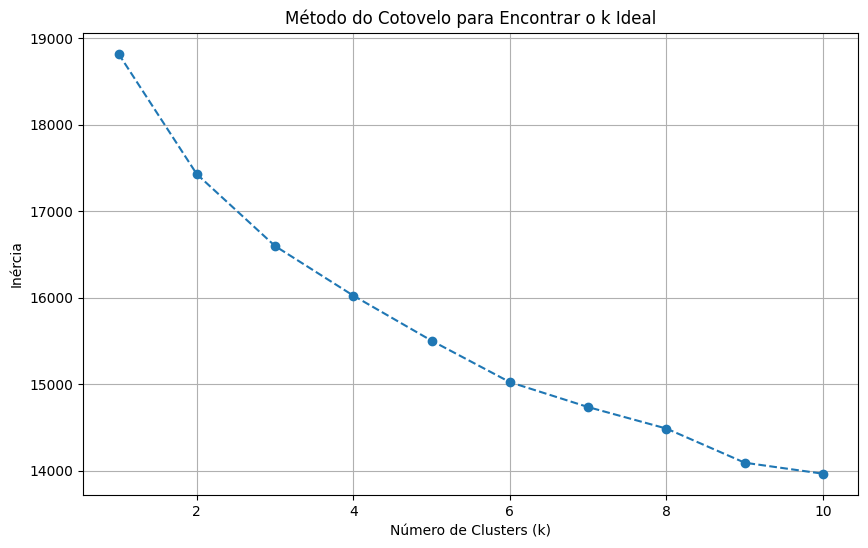

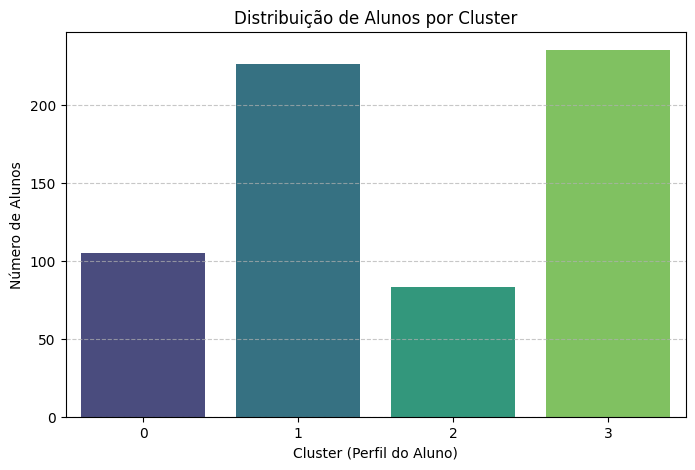

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

#força o pandas a exibir todas as colunas de um DataFrame
pd.set_option('display.max_columns', None)

df = pd.read_csv('features.csv')

df_processed = df.copy()

#normalização dos Dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_processed)

#Método do Cotovelo
inertia = []
K_range = range(1, 11)  

for k in K_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_model.fit(data_scaled)
    inertia.append(kmeans_model.inertia_)

#plotar o gráfico do cotovelo para visualizar o k ideal
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Encontrar o k Ideal')
plt.grid(True)
plt.savefig('elbow_method.png')

K_IDEAL = 4

#aplicar o Kmeans
kmeans = KMeans(n_clusters=K_IDEAL, random_state=42, n_init=10)
kmeans.fit(data_scaled)

#nova coluna com o cluster de cada aluno.
df['cluster'] = kmeans.labels_

#calculando a média de todos atributos para cada grupo
cluster_analysis = df.groupby('cluster').mean()

print("\n--- Análise dos Perfis de Alunos por Cluster ---")
print(cluster_analysis.round(2))

#criar gráfico
plt.figure(figsize=(8, 5))
sns.countplot(x='cluster', data=df, palette='viridis')
plt.title('Distribuição de Alunos por Cluster')
plt.xlabel('Cluster (Perfil do Aluno)')
plt.ylabel('Número de Alunos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('cluster_distribution.png') 